## Naomi, Parshana, Sinchana, Joanna

In [250]:
%pip install pandas numpy matplotlib scikit-learn 

Note: you may need to restart the kernel to use updated packages.


In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources if not already downloaded
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/naominayman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/naominayman/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## TASK 1 - EDA

### Question 1

In [252]:
df_main = pd.read_csv("S19_All_Release_2_10_22/Data/MainTable.csv")
df_subj = pd.read_csv("S19_All_Release_2_10_22/Data/LinkTables/Subject.csv")
df_problems = pd.read_csv("2nd CSEDM Data Challenge - Problem Prompts & Concepts Used - Sheet1.CSV")

In [253]:
# Number of unique students - using MainTable.csv
len(df_main['SubjectID'].unique())

413

In [254]:
# Number of unique students - using LinkTables/Subject.csv
len(df_subj['SubjectID'].unique())
# Less because some people dropped the class

372

### Question 2

In [255]:
df_early = pd.read_csv("S19_All_Release_2_10_22/early.csv")
df_late = pd.read_csv("S19_All_Release_2_10_22/late.csv")
df_all = pd.concat([df_early, df_late])

In [256]:
mean_attempts = df_all.groupby(['AssignmentID', 'ProblemID'])['Attempts'].mean()
mean_attempts.head()
print(f"Assignment {mean_attempts.idxmax()[0]} Problem {mean_attempts.idxmax()[1]} had the most attempts at {mean_attempts.max()}.")

Assignment 487.0 Problem 102 had the most attempts at 10.422535211267606.


### Question 3

In [257]:
df_main = pd.read_csv("S19_All_Release_2_10_22/Data/MainTable.csv")
df_compile = df_main[df_main['EventType'] == "Compile"]

In [258]:
compile_errors = df_compile[df_compile['Compile.Result'] == 'Error']
grouped_compile_errors = compile_errors.groupby(['AssignmentID', 'ProblemID'])['Compile.Result'].size()
print(f"Assignment {grouped_compile_errors.idxmax()[0]} Problem {grouped_compile_errors.idxmax()[1]} had the most compile errors at {grouped_compile_errors.max()}.")

Assignment 439.0 Problem 13 had the most compile errors at 2440.


Computing the total number of compiler errors faced on each problem, and report the maximum is more meaningful because it directly answers which problems had the most compile errors from all students. This is more meaningful for knowing which problems students as a whole struggled with compiling.

## Task 2 - Open-Ended Analysis

### Predicting Score from problem features

In [259]:
df_subj

,SubjectID,X-Grade
0,65be44ae7088566069cc3bef454174a7,0.3600
1,0bdf2c1f053650715e1f0c725d754b96,0.3917
2,ad8d3a0a0f0a084a97fad357c649438c,0.6160
3,f4db8537e9d75da46c4efc36a2d70956,0.4310
4,d7419ae04f248e5105ac3d0700389775,0.7244
...,...,...
368,e2d083a5fd066b082d93042169313e21,0.6800
369,2e667fca5e24ac13dcee94ddc4aa751a,0.0000
370,65a5e77645ee9f1918165a0a8c503297,0.0000
371,c8720c9e82b818798e7b391fd62adf33,0.9200


In [260]:
df_main

,Order,SubjectID,ToolInstances,ServerTimestamp,ServerTimezone,CourseID,CourseSectionID,AssignmentID,ProblemID,CodeStateID,IsEventOrderingConsistent,EventType,Score,Compile.Result,CompileMessageType,CompileMessageData,EventID,ParentEventID,SourceLocation
0,119630,00c54f9462673d4c09d2a88121860841,Java 8; CodeWorkout,2019-02-24T05:13:03,UTC,CS 1,1,439.0,1,efdf3fae54cdc0a09fb81fcfa365c5f843e837b0,True,Run.Program,1.00,NaN,NaN,NaN,1-69176,NaN,NaN
1,119631,00c54f9462673d4c09d2a88121860841,Java 8; CodeWorkout,2019-02-24T05:13:03,UTC,CS 1,1,439.0,1,efdf3fae54cdc0a09fb81fcfa365c5f843e837b0,True,Compile,NaN,Success,NaN,NaN,1-69177,1-69176,NaN
2,134330,00c54f9462673d4c09d2a88121860841,Java 8; CodeWorkout,2019-02-24T05:13:33,0,CS 1,1,439.0,3,79b2bcc8f502e1f7d2d4e83d1894964684c89b85,True,Run.Program,1.00,NaN,NaN,NaN,3-68089,NaN,NaN
3,134331,00c54f9462673d4c09d2a88121860841,Java 8; CodeWorkout,2019-02-24T05:13:33,0,CS 1,1,439.0,3,79b2bcc8f502e1f7d2d4e83d1894964684c89b85,True,Compile,NaN,Success,NaN,NaN,3-68090,3-68089,NaN
4,65666,00c54f9462673d4c09d2a88121860841,Java 8; CodeWorkout,2019-02-24T05:09:54,UTC,CS 1,1,439.0,5,2697d299e7c5992f557ce38d8a04345112a11af8,True,Run.Program,0.75,NaN,NaN,NaN,5-35681,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201565,108283,ffb72475a81de0e95b910ffad039f5c2,Java 8; CodeWorkout,2019-05-05T23:46:43,0,CS 1,1,502.0,71,9e7128eff25bb3a3a9860fa47cfe100c08f31f58,True,Compile,NaN,Success,NaN,NaN,71-3029,71-3028,NaN
201566,110202,ffb72475a81de0e95b910ffad039f5c2,Java 8; CodeWorkout,2019-05-05T23:50:16,0,CS 1,1,502.0,112,6f094eec8e43a75c47ef236a487cc76442cc7b7b,True,Run.Program,1.00,NaN,NaN,NaN,112-2391,NaN,NaN
201567,110203,ffb72475a81de0e95b910ffad039f5c2,Java 8; CodeWorkout,2019-05-05T23:50:16,0,CS 1,1,502.0,112,6f094eec8e43a75c47ef236a487cc76442cc7b7b,True,Compile,NaN,Success,NaN,NaN,112-2392,112-2391,NaN
201568,81273,ffb72475a81de0e95b910ffad039f5c2,Java 8; CodeWorkout,2019-05-06T00:02:36,0,CS 1,1,502.0,118,899f7092e7960366de80fdfca077387ac5c26a04,True,Run.Program,1.00,NaN,NaN,NaN,118-5994,NaN,NaN


In [261]:
df_score = df_main[df_main['EventType'] == "Run.Program"]
df_score = df_score.groupby(['SubjectID', 'AssignmentID', 'ProblemID'])['Score'].max().reset_index()
df_score.head()

,SubjectID,AssignmentID,ProblemID,Score
0,00c54f9462673d4c09d2a88121860841,439.0,1,1.0
1,00c54f9462673d4c09d2a88121860841,439.0,3,1.0
2,00c54f9462673d4c09d2a88121860841,439.0,5,1.0
3,00c54f9462673d4c09d2a88121860841,439.0,12,1.0
4,00c54f9462673d4c09d2a88121860841,439.0,13,1.0


In [262]:
score_problems = pd.merge(df_score, df_problems, on=['AssignmentID', 'ProblemID'], how='inner')
score_problems.head()

,SubjectID,AssignmentID,ProblemID,Score,Requirement,If/Else,NestedIf,While,For,NestedFor,...,LogicCompareNum,LogicBoolean,StringFormat,StringConcat,StringIndex,StringLen,StringEqual,CharEqual,ArrayIndex,DefFunction
0,00c54f9462673d4c09d2a88121860841,439.0,1,1.0,Write a function in Java that implements the f...,1.0,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00c54f9462673d4c09d2a88121860841,439.0,3,1.0,Write a function in Java that implements the f...,1.0,1.0,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00c54f9462673d4c09d2a88121860841,439.0,5,1.0,Write a function in Java that implements the f...,1.0,1.0,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00c54f9462673d4c09d2a88121860841,439.0,12,1.0,Write a function in Java that implements the f...,1.0,1.0,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00c54f9462673d4c09d2a88121860841,439.0,13,1.0,Write a function in Java that implements the f...,1.0,1.0,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [263]:
df_all

,SubjectID,AssignmentID,ProblemID,Attempts,CorrectEventually,Label
0,036ad3e516c5bf3a4b3be35b137bcbb8,439.0,1,8,True,False
1,036ad3e516c5bf3a4b3be35b137bcbb8,439.0,3,6,True,False
2,036ad3e516c5bf3a4b3be35b137bcbb8,439.0,5,7,True,False
3,036ad3e516c5bf3a4b3be35b137bcbb8,439.0,12,2,True,True
4,036ad3e516c5bf3a4b3be35b137bcbb8,439.0,13,17,True,False
...,...,...,...,...,...,...
5717,ffb72475a81de0e95b910ffad039f5c2,502.0,64,2,True,True
5718,ffb72475a81de0e95b910ffad039f5c2,502.0,70,2,True,True
5719,ffb72475a81de0e95b910ffad039f5c2,502.0,71,1,True,True
5720,ffb72475a81de0e95b910ffad039f5c2,502.0,112,1,True,True


In [264]:
df_problems.head()

,AssignmentID,ProblemID,Requirement,If/Else,NestedIf,While,For,NestedFor,Math+-*/,Math%,...,LogicCompareNum,LogicBoolean,StringFormat,StringConcat,StringIndex,StringLen,StringEqual,CharEqual,ArrayIndex,DefFunction
0,439,1,Write a function in Java that implements the f...,1.0,NaN,NaN,NaN,NaN,1.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,439,3,Write a function in Java that implements the f...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,439,5,Write a function in Java that implements the f...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,439,12,Write a function in Java that implements the f...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,439,13,Write a function in Java that implements the f...,1.0,1.0,NaN,NaN,NaN,1.0,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [265]:
## collapse to one row per student by averaging the number of attempts per problem

df_grades = pd.merge(df_score, df_all, on=['SubjectID', 'AssignmentID', 'ProblemID'], how='inner')
#df_grades = df_grades.groupby(['SubjectID', 'AssignmentID', 'ProblemID'])[['Attempts', 'Score']].max()
df_grades = pd.merge(df_grades, df_subj, on=['SubjectID'], how='inner')
df_grades = pd.merge(df_grades, df_problems, on=['AssignmentID', 'ProblemID'], how='inner')
df_grades.columns

Index(['SubjectID', 'AssignmentID', 'ProblemID', 'Score', 'Attempts',
       'CorrectEventually', 'Label', 'X-Grade', 'Requirement', 'If/Else',
       'NestedIf', 'While', 'For', 'NestedFor', 'Math+-*/', 'Math%',
       'LogicAndNotOr', 'LogicCompareNum', 'LogicBoolean', 'StringFormat',
       'StringConcat', 'StringIndex', 'StringLen', 'StringEqual', 'CharEqual',
       'ArrayIndex', 'DefFunction'],
      dtype='object')

In [266]:
important_columns = ['SubjectID', 'AssignmentID', 'ProblemID', 'Attempts', 'Score', 'X-Grade','Requirement', 'If/Else',
       'NestedIf', 'While', 'For', 'NestedFor', 'Math+-*/', 'Math%',
       'LogicAndNotOr', 'LogicCompareNum', 'LogicBoolean', 'StringFormat',
       'StringConcat', 'StringIndex', 'StringLen', 'StringEqual', 'CharEqual',
       'ArrayIndex', 'DefFunction']

In [267]:
df_model = df_grades[important_columns]
df_model.head()
df_max = df_model.loc[df_model.groupby(['SubjectID', 'AssignmentID', 'ProblemID'])['Score'].idxmax()]
df_max.head()

,SubjectID,AssignmentID,ProblemID,Attempts,Score,X-Grade,Requirement,If/Else,NestedIf,While,...,LogicCompareNum,LogicBoolean,StringFormat,StringConcat,StringIndex,StringLen,StringEqual,CharEqual,ArrayIndex,DefFunction
0,036ad3e516c5bf3a4b3be35b137bcbb8,439.0,1,8,1.0,0.772,Write a function in Java that implements the f...,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,036ad3e516c5bf3a4b3be35b137bcbb8,439.0,3,6,1.0,0.772,Write a function in Java that implements the f...,1.0,1.0,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,036ad3e516c5bf3a4b3be35b137bcbb8,439.0,5,7,1.0,0.772,Write a function in Java that implements the f...,1.0,1.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,036ad3e516c5bf3a4b3be35b137bcbb8,439.0,12,2,1.0,0.772,Write a function in Java that implements the f...,1.0,1.0,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,036ad3e516c5bf3a4b3be35b137bcbb8,439.0,13,17,1.0,0.772,Write a function in Java that implements the f...,1.0,1.0,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [268]:
df_max.columns

Index(['SubjectID', 'AssignmentID', 'ProblemID', 'Attempts', 'Score',
       'X-Grade', 'Requirement', 'If/Else', 'NestedIf', 'While', 'For',
       'NestedFor', 'Math+-*/', 'Math%', 'LogicAndNotOr', 'LogicCompareNum',
       'LogicBoolean', 'StringFormat', 'StringConcat', 'StringIndex',
       'StringLen', 'StringEqual', 'CharEqual', 'ArrayIndex', 'DefFunction'],
      dtype='object')

In [269]:
def replace_problem_details_with_score(df):
    problem_detail_cols = ['If/Else', 'NestedIf', 'While', 'For',
       'NestedFor', 'Math+-*/', 'Math%', 'LogicAndNotOr', 'LogicCompareNum',
       'LogicBoolean', 'StringFormat', 'StringConcat', 'StringIndex',
       'StringLen', 'StringEqual', 'CharEqual', 'ArrayIndex', 'DefFunction']

    for col in problem_detail_cols:
        df[col] = df.apply(lambda row: row['Score'] if row[col] == 1 else row[col], axis=1)
    
    return df

df_updated = replace_problem_details_with_score(df_max)

df_updated.head()

,SubjectID,AssignmentID,ProblemID,Attempts,Score,X-Grade,Requirement,If/Else,NestedIf,While,...,LogicCompareNum,LogicBoolean,StringFormat,StringConcat,StringIndex,StringLen,StringEqual,CharEqual,ArrayIndex,DefFunction
0,036ad3e516c5bf3a4b3be35b137bcbb8,439.0,1,8,1.0,0.772,Write a function in Java that implements the f...,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,036ad3e516c5bf3a4b3be35b137bcbb8,439.0,3,6,1.0,0.772,Write a function in Java that implements the f...,1.0,1.0,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,036ad3e516c5bf3a4b3be35b137bcbb8,439.0,5,7,1.0,0.772,Write a function in Java that implements the f...,1.0,1.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,036ad3e516c5bf3a4b3be35b137bcbb8,439.0,12,2,1.0,0.772,Write a function in Java that implements the f...,1.0,1.0,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,036ad3e516c5bf3a4b3be35b137bcbb8,439.0,13,17,1.0,0.772,Write a function in Java that implements the f...,1.0,1.0,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [270]:
df_model = df_updated.groupby(['SubjectID', 'X-Grade'])[['If/Else',
       'NestedIf', 'While', 'For', 'NestedFor', 'Math+-*/', 'Math%',
       'LogicAndNotOr', 'LogicCompareNum', 'LogicBoolean', 'StringFormat',
       'StringConcat', 'StringIndex', 'StringLen', 'StringEqual', 'CharEqual',
       'ArrayIndex', 'DefFunction']].mean()

In [271]:
df_model.head()

,,If/Else,NestedIf,While,For,NestedFor,Math+-*/,Math%,LogicAndNotOr,LogicCompareNum,LogicBoolean,StringFormat,StringConcat,StringIndex,StringLen,StringEqual,CharEqual,ArrayIndex,DefFunction
SubjectID,X-Grade,,,,,,,,,,,,,,,,,,
036ad3e516c5bf3a4b3be35b137bcbb8,0.7720,1.000000,1.0,1.000000,1.0,1.0,1.000,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
04c32d4d95425f73b3a1d6502aed4d48,0.7060,1.000000,1.0,1.000000,1.0,1.0,1.000,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0503bf609757acf2e75aa8cbc0d8323b,0.7617,1.000000,1.0,1.000000,1.0,1.0,1.000,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
06d801cb636235b298c40029ad9921e7,0.8800,1.000000,1.0,1.000000,1.0,1.0,1.000,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
07ae4cca3f90a49347ccb5c1a82ff46f,0.8400,0.998182,1.0,0.973333,1.0,1.0,0.996,1.0,0.997333,0.997949,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Start building the model (s)

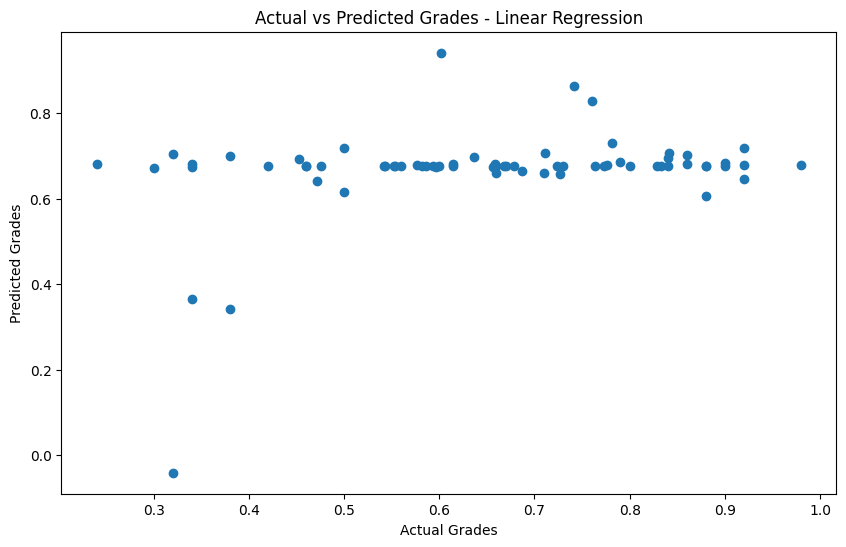

Root Mean Squared Error: 0.18225271774118884


In [272]:
df_model = df_model.fillna(df_model.median())  # or df.fillna(df.median())

df_model.reset_index(inplace=True)

y = df_model['X-Grade']

X = df_model[['If/Else',
       'NestedIf', 'While', 'For', 'NestedFor', 'Math+-*/', 'Math%',
       'LogicAndNotOr', 'LogicCompareNum', 'LogicBoolean', 'StringFormat',
       'StringConcat', 'StringIndex', 'StringLen', 'StringEqual', 'CharEqual',
       'ArrayIndex', 'DefFunction']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.title('Actual vs Predicted Grades - Linear Regression')
#plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()
RMSE = root_mean_squared_error(y_test, y_pred)
print(f'Root Mean Squared Error: {RMSE}')



Root Mean Squared Error: 0.19515507530459683


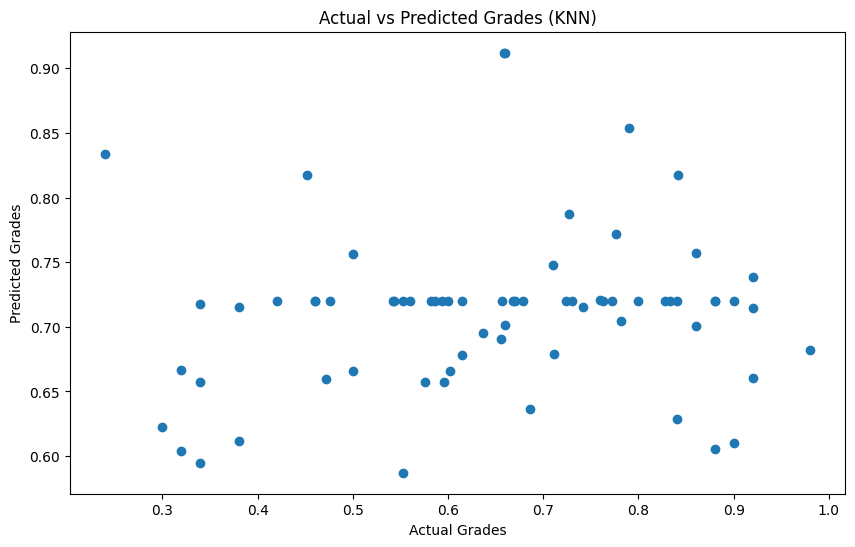

In [273]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn)
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.title('Actual vs Predicted Grades (KNN)')

RMSE = root_mean_squared_error(y_test, y_pred_knn)
print(f'Root Mean Squared Error: {RMSE}')


Root Mean Squared Error: 0.19219270831644467


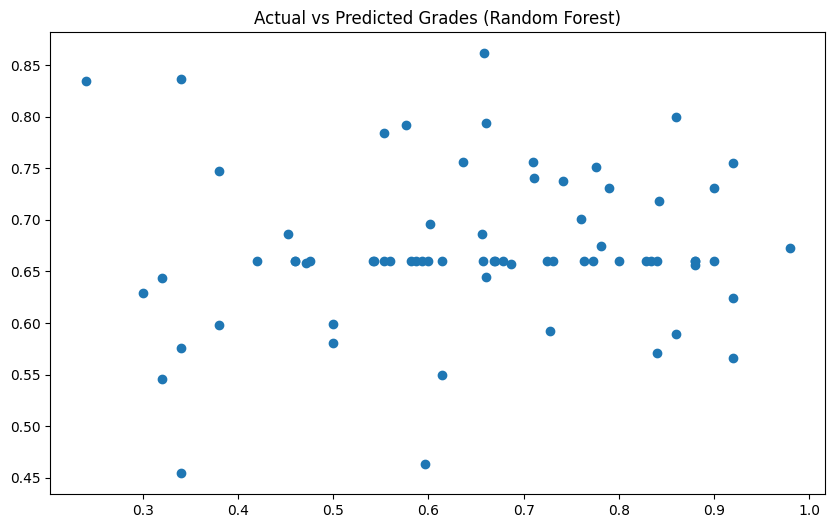

In [274]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf)
plt.title('Actual vs Predicted Grades (Random Forest)')
RMSE = root_mean_squared_error(y_test, y_pred_rf)
print(f'Root Mean Squared Error: {RMSE}')


Root Mean Squared Error: 0.18809111478984628


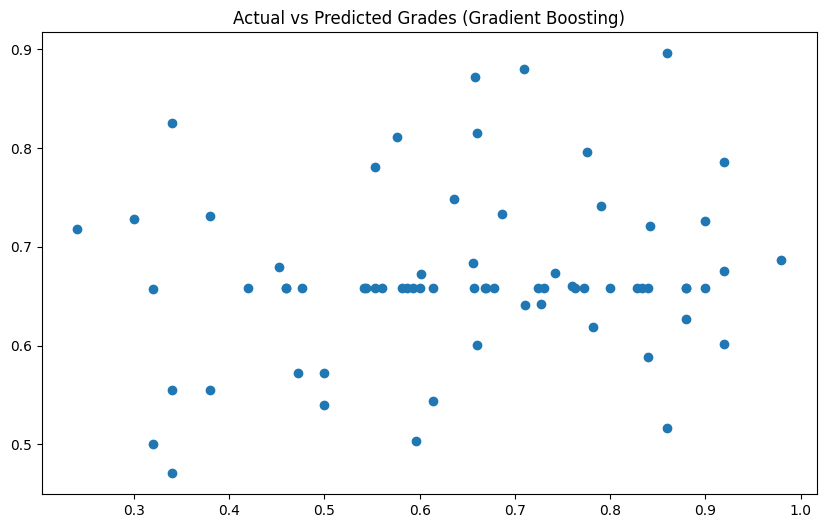

In [275]:
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb)
plt.title('Actual vs Predicted Grades (Gradient Boosting)')
RMSE = root_mean_squared_error(y_test, y_pred_gb)
print(f'Root Mean Squared Error: {RMSE}')

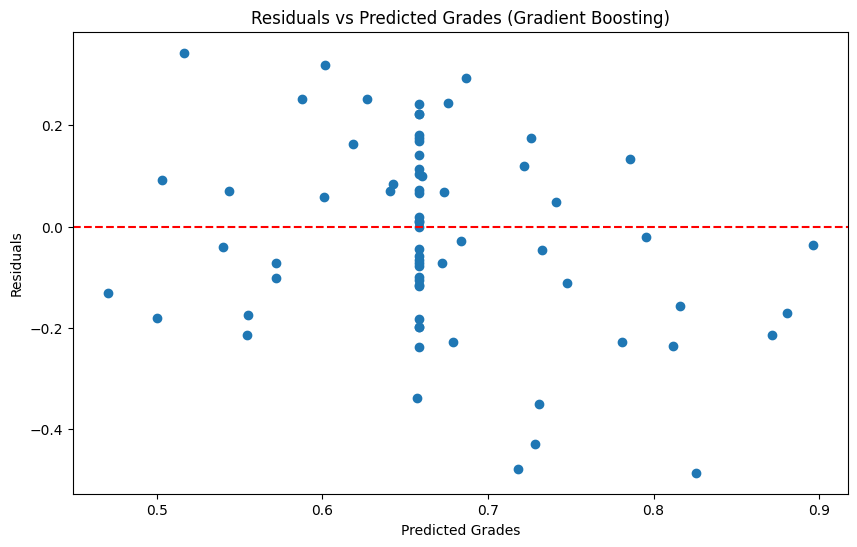

In [276]:
# plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_gb, y_test - y_pred_gb)
plt.xlabel('Predicted Grades')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Grades (Gradient Boosting)')
plt.axhline(y=0, color='r', linestyle='--')


Root Mean Squared Error: 0.1722016509410632


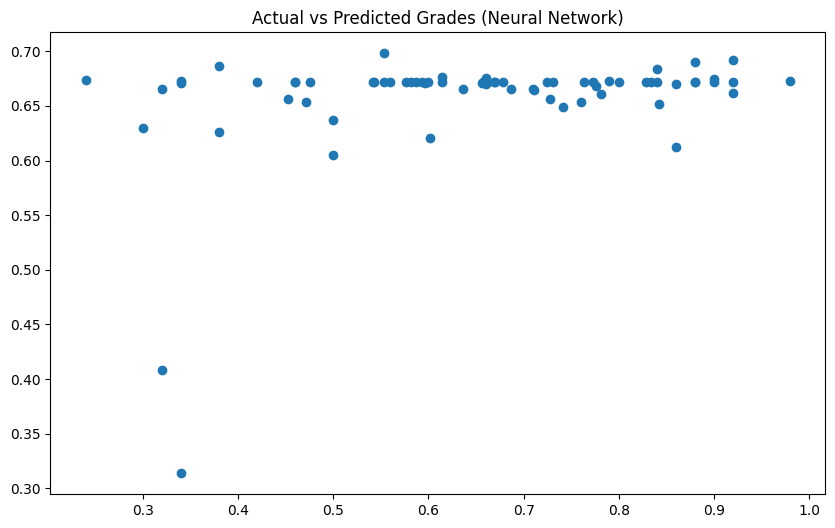

In [277]:
nn = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn)
plt.title('Actual vs Predicted Grades (Neural Network)')
RMSE = root_mean_squared_error(y_test, y_pred_nn)
print(f'Root Mean Squared Error: {RMSE}')

Epoch 1/250


/Users/naominayman/Desktop/CalPoly/csc313/313-Data-Mining/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2286 - root_mean_squared_error: 0.4690 - val_loss: 0.0708 - val_root_mean_squared_error: 0.2660
Epoch 2/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0579 - root_mean_squared_error: 0.2404 - val_loss: 0.0430 - val_root_mean_squared_error: 0.2073
Epoch 3/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0459 - root_mean_squared_error: 0.2141 - val_loss: 0.0328 - val_root_mean_squared_error: 0.1811
Epoch 4/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0364 - root_mean_squared_error: 0.1908 - val_loss: 0.0326 - val_root_mean_squared_error: 0.1805
Epoch 5/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0379 - root_mean_squared_error: 0.1945 - val_loss: 0.0348 - val_root_mean_squared_error: 0.1865
Epoch 6/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0345 - root_mean_squared_error: 0.1857 - val_loss: 0.0307 - val_root_mean_squared_error: 0.1751
Epoch 7/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0347 - root_mean_squar

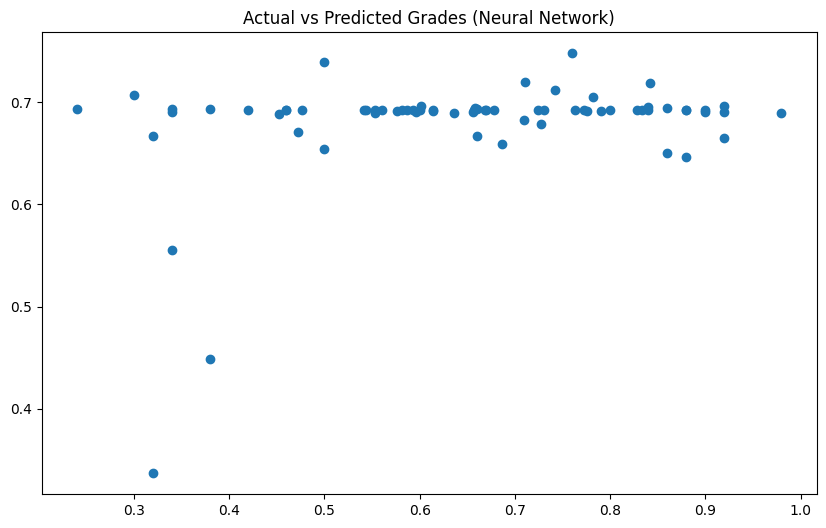

In [278]:
# Define the model
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['root_mean_squared_error'])

history = model.fit(X_train, y_train, epochs=250, batch_size=32, validation_split=0.2, verbose=1)

y_pred_nn = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn)
plt.title('Actual vs Predicted Grades (Neural Network)')
RMSE = root_mean_squared_error(y_test, y_pred_nn)
print(f'Root Mean Squared Error: {RMSE}')

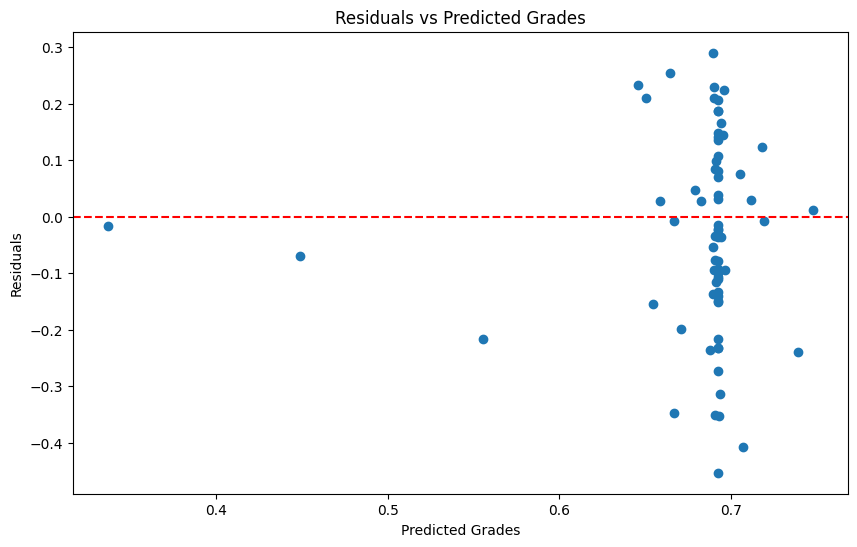

In [279]:
# plot residuals
y_pred_nn = y_pred_nn.flatten()
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred_nn
plt.scatter(y_pred_nn, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Grades')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Grades')
plt.show()


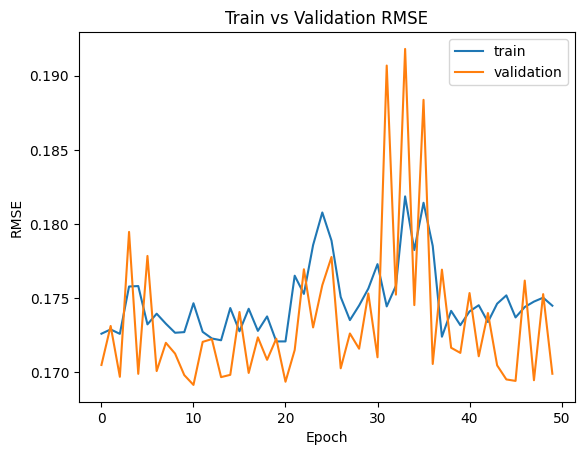

In [280]:
# plot train vs test RMSE
plt.plot(history.history['root_mean_squared_error'][200:], label='train')
plt.plot(history.history['val_root_mean_squared_error'][200:], label='validation')

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Train vs Validation RMSE')
plt.show()

## Attempting TFIDF

In [281]:
df_max.head()

,SubjectID,AssignmentID,ProblemID,Attempts,Score,X-Grade,Requirement,If/Else,NestedIf,While,...,LogicCompareNum,LogicBoolean,StringFormat,StringConcat,StringIndex,StringLen,StringEqual,CharEqual,ArrayIndex,DefFunction
0,036ad3e516c5bf3a4b3be35b137bcbb8,439.0,1,8,1.0,0.772,Write a function in Java that implements the f...,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,036ad3e516c5bf3a4b3be35b137bcbb8,439.0,3,6,1.0,0.772,Write a function in Java that implements the f...,1.0,1.0,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,036ad3e516c5bf3a4b3be35b137bcbb8,439.0,5,7,1.0,0.772,Write a function in Java that implements the f...,1.0,1.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,036ad3e516c5bf3a4b3be35b137bcbb8,439.0,12,2,1.0,0.772,Write a function in Java that implements the f...,1.0,1.0,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,036ad3e516c5bf3a4b3be35b137bcbb8,439.0,13,17,1.0,0.772,Write a function in Java that implements the f...,1.0,1.0,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [282]:
## find average score and attempts per problem
df_problem_avg = df_max.groupby(['AssignmentID','ProblemID', 'Requirement'])[['Score', 'Attempts']].mean().reset_index()

In [283]:
## problem wording preprocessing
lemma = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def custom_tokenizer(text):
    tokens = nltk.word_tokenize(text)
    tokens = [lemma.lemmatize(w.lower()) for w in tokens if w not in stop_words]
    return tokens

/Users/naominayman/Desktop/CalPoly/csc313/313-Data-Mining/.venv/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


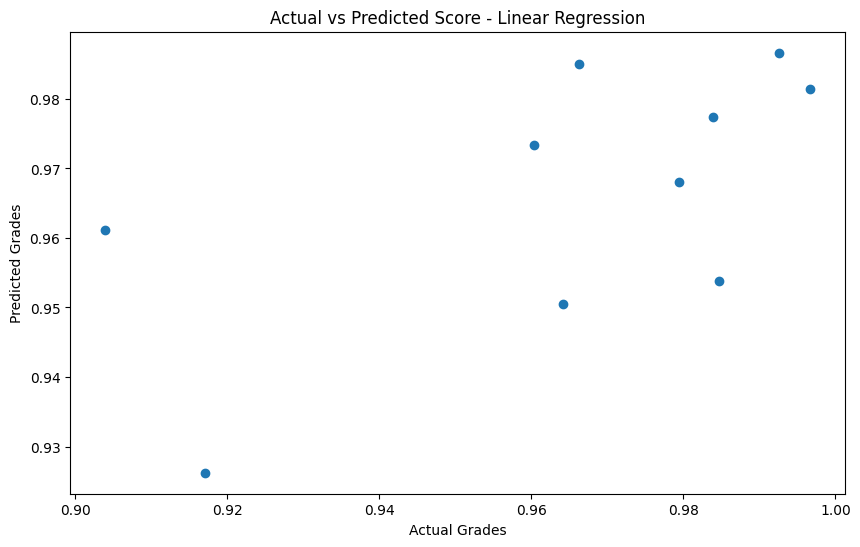

Root Mean Squared Error: 0.023356226783750735


In [331]:
#X = vectorizer.fit_transform(df_problem_avg['Requirement'])
#df_problem_avg['tokenized'] = vectorizer.fit_transform(df_problem_avg['Requirement']).toarray().tolist()

vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer)
mms = MinMaxScaler()
X_text = vectorizer.fit_transform(df_problem_avg['Requirement']).toarray()  # Convert to NumPy array
med = df_problem_avg['Score'].median()
df_problem_avg['score_cat'] = df_problem_avg['Score'].apply(lambda x: 1 if x > med else 0)

# Add additional numerical features
#X_attempts = df_problem_avg[['Attempts']].values
X_attempts = mms.fit_transform(df_problem_avg[['Attempts']])

X = np.hstack((X_text, X_attempts))

y_cat = df_problem_avg['score_cat']
y = df_problem_avg['Score']
#X = df_problem_avg[['tokenized', 'Attempts']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X, y_cat, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.title('Actual vs Predicted Score - Linear Regression')
plt.show()
RMSE = root_mean_squared_error(y_test, y_pred)
print(f'Root Mean Squared Error: {RMSE}')

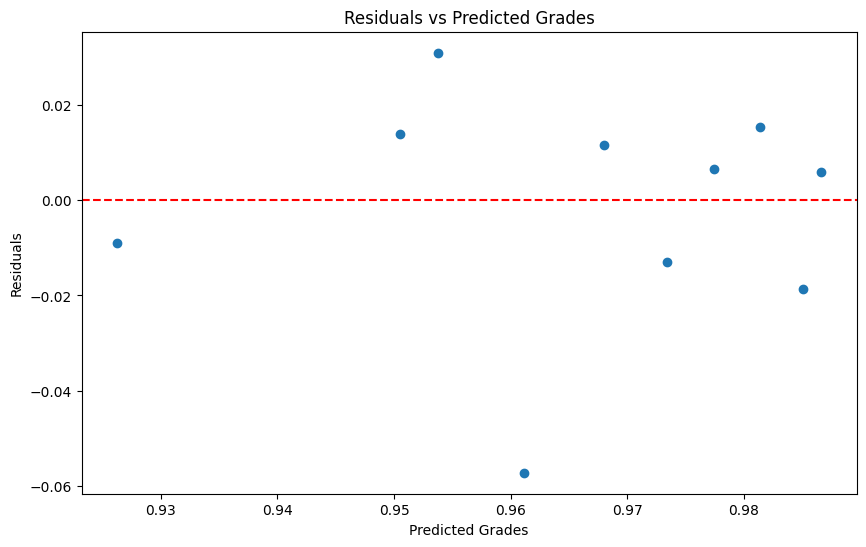

In [343]:
# plot residuals

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test - y_pred)
plt.xlabel('Predicted Grades')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Grades')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

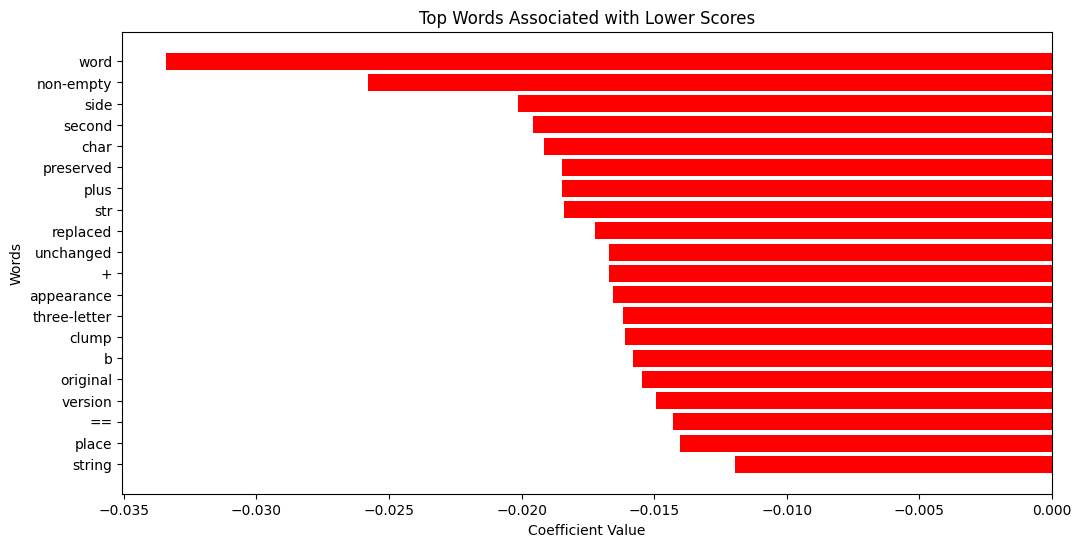

In [326]:
feature_names = vectorizer.get_feature_names_out()

# Get model coefficients
coefficients = model.coef_[:-1]  # Exclude the last coefficient (Attempts)

# Create a DataFrame for analysis
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort by most negative coefficients (words that lead to worse scores)
feature_importance = feature_importance.sort_values(by='Coefficient')

# Display the top negative words
top_negative_words = feature_importance.head(20)

# Plot the results
plt.figure(figsize=(12, 6))
plt.barh(top_negative_words['Feature'], top_negative_words['Coefficient'], color='red')
plt.xlabel('Coefficient Value')
plt.ylabel('Words')
plt.title('Top Words Associated with Lower Scores')
plt.gca().invert_yaxis()
plt.show()

In [319]:
df_problem_avg[df_problem_avg['Requirement'].str.contains('word', case=False, na=False)]#['Requirement'].tolist()

,AssignmentID,ProblemID,Requirement,Score,Attempts,score_cat
21,492.0,32,Write a function in Java that implements the f...,0.890000,6.603333,0
25,492.0,37,"Given two strings, return true if either of th...",0.984631,3.859813,1


In [321]:
df_problem_avg[df_problem_avg['Requirement'].str.contains('word', case=False, na=False)]['Requirement'].tolist()[0]

'Write a function in Java that implements the following logic: Given a string str and a non-empty word, return a version of the original string where all chars have been replaced by pluses (+), except for appearances of the word which are preserved unchanged.'

**This problem has the worst performance**

Root Mean Squared Error: 0.027829304839163106


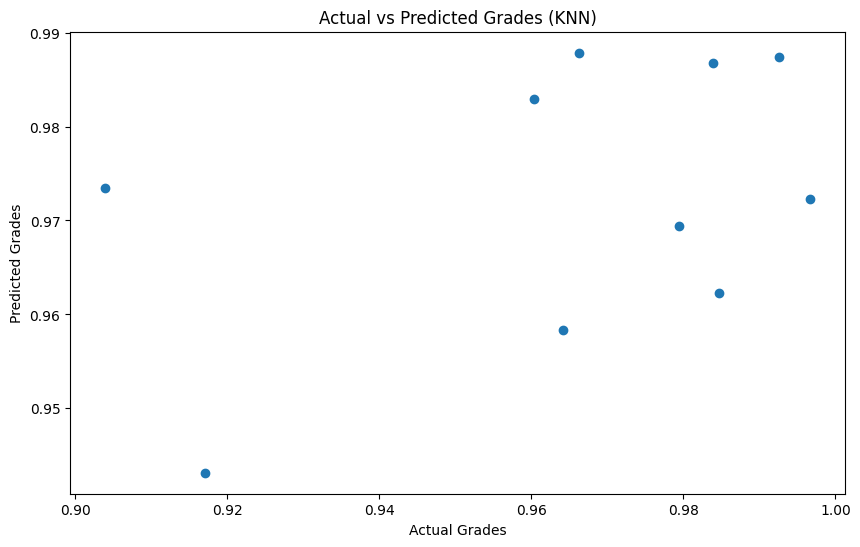

In [341]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn)
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.title('Actual vs Predicted Grades (KNN)')
RMSE = root_mean_squared_error(y_test, y_pred_knn)
print(f'Root Mean Squared Error: {RMSE}')